In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Splitting Dataset into Train set and Test set](#3)
4. [Feature Scaling](#4)
5. [Training Kernel SVM Model on the Training Set](#5)
6. [Confusion Matrix](#6)
7. [Applying a k-Fold Cross Validation](#7)
8. [Visualizing Training set results](#8)
9. [Visualizing Test set results](#9)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

#3. Train Test Split
from sklearn.model_selection import train_test_split

#4. Feature Scaling
from sklearn.preprocessing import StandardScaler

#5. Kernel SVM
from sklearn.svm import SVC

#6. Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

#7. f-Fold Cross Validation
from sklearn.model_selection import cross_val_score

<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<a id="3"></a>
# 3. Splitting Dataset into Train set and Test set

[Go back to Index](#index)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<a id="4"></a>
# 4. Feature Scaling

[Go back to Index](#index)

In [7]:
sc = StandardScaler()

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="5"></a>
# 5. Training Kernel SVM Model on the training set

[Go back to Index](#index)

In [9]:
classifier = SVC(kernel = "rbf", random_state=0)

In [10]:
classifier.fit(X_train, y_train)

SVC(random_state=0)

<a id="6"></a>
# 6. Confusion Matrix

[Go back to Index](#index)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
print(cm)

[[64  4]
 [ 3 29]]


In [14]:
accuracy_score(y_test, y_pred)

0.93

<a id="7"></a>
# 7. Applying k-Fold Cross Validation

[Go back to Index](#index)

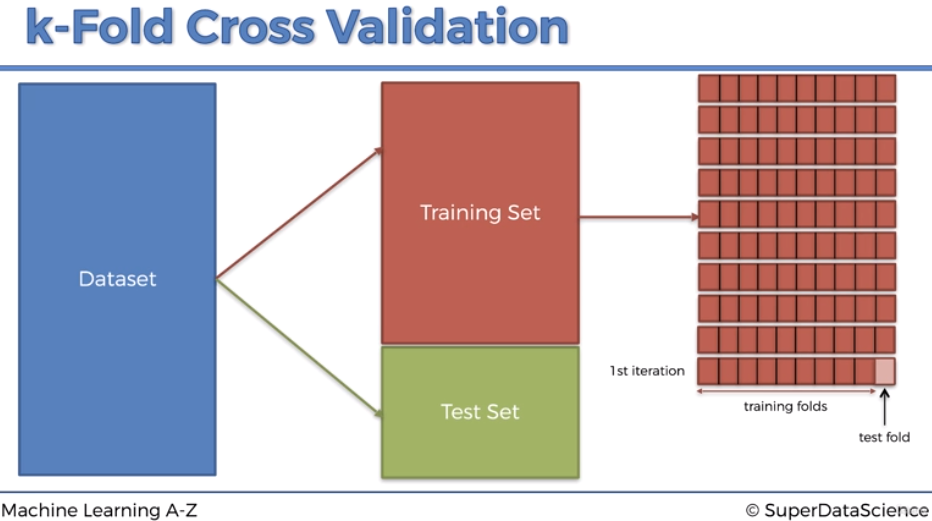

In [15]:
accuracies = cross_val_score(
    estimator = classifier,
    X = X_train,
    y = y_train,
    cv = 10 # number of cross validations
)

In [16]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 90.33 %


In [17]:
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Standard Deviation: 6.57 %


<a id="8"></a>
# 8. Visualizing Training Set Results

[Go back to Index](#index)

/tmp/ipykernel_19/522931537.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


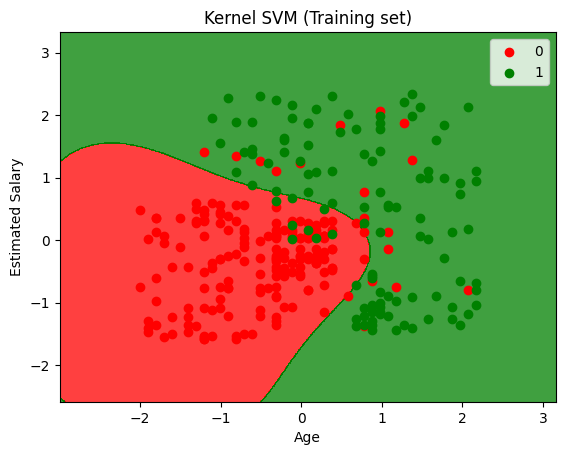

In [18]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<a id="9"></a>
# 9. Visualizing Test Set Results

[Go back to Index](#index)

/tmp/ipykernel_19/493352116.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


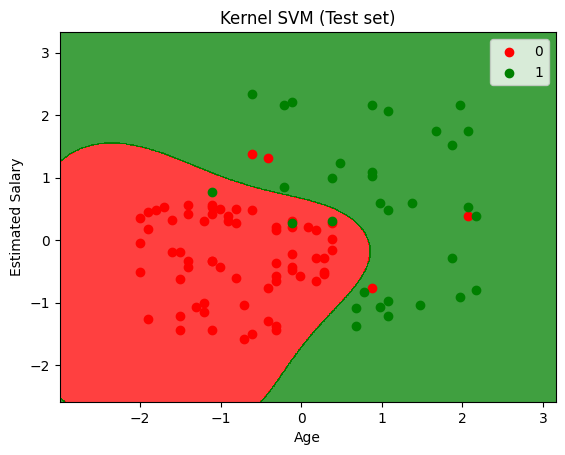

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()